In [18]:
# Imports

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pprint
import glob

import requests
import wget
import urllib

%matplotlib inline

In [25]:
list_of_dates = ['151107','151031','151024','151017','151010','151003','150926','150919']

for date in list_of_dates:
    
    url = 'http://web.mta.info/developers/data/nyct/turnstile/turnstile_{}.txt'.format(date)

    response = requests.get(url)
    urllib.request.urlretrieve(url,'DataFiles/turnstile_'+date+'.txt')
    print('Done downloading ' + 'turnstile_'+date+'.txt')
print("Done downloading all files!")

Done downloading turnstile_151107.txt
Done downloading turnstile_151031.txt
Done downloading turnstile_151024.txt
Done downloading turnstile_151017.txt
Done downloading turnstile_151010.txt
Done downloading turnstile_151003.txt
Done downloading turnstile_150926.txt
Done downloading turnstile_150919.txt


In [27]:
# Creating the initial dataframe
list_of_files = []
for filename in glob.glob("Datafiles/turnstile_*.txt"):
    list_of_files.append(filename)
df = pd.concat(pd.read_csv(file) for file in list_of_files)

In [46]:
print('Basic Panel Info')
print(df.info())

Basic Panel Info
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1555982 entries, 0 to 196657
Data columns (total 11 columns):
C/A                                                                     1555982 non-null object
UNIT                                                                    1555982 non-null object
SCP                                                                     1555982 non-null object
STATION                                                                 1555982 non-null object
LINENAME                                                                1555982 non-null object
DIVISION                                                                1555982 non-null object
DATE                                                                    1555982 non-null object
TIME                                                                    1555982 non-null object
DESC                                                                    1555982 non-null object
ENTRIES

In [47]:
print('Row,Columns', df.shape)

Row,Columns (1555982, 11)


/Users/Hayw1re/Applications/anaconda3/lib/python3.5/site-packages/pandas/core/generic.py:2698: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


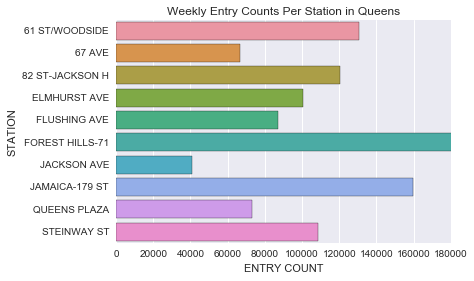

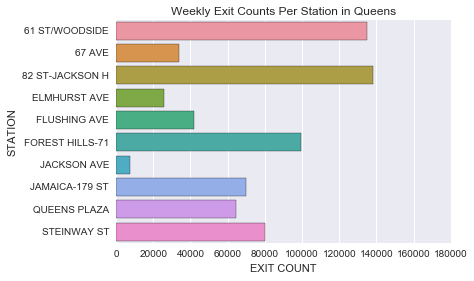

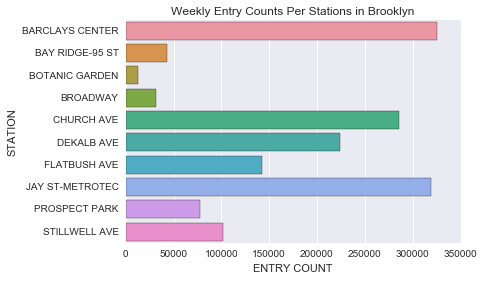

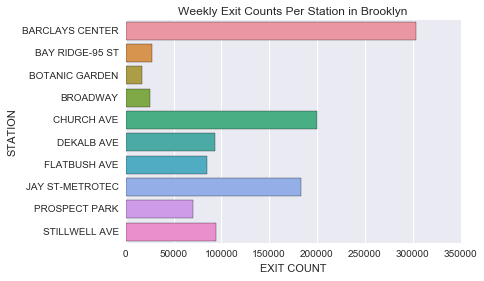

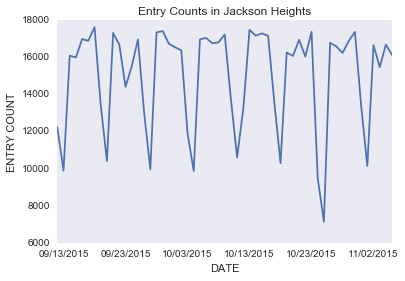

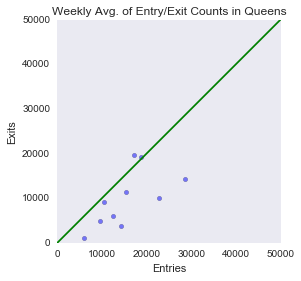

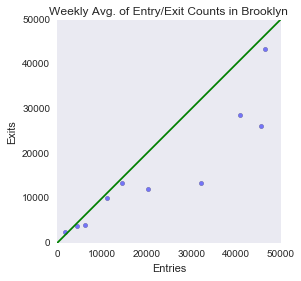

In [ ]:
df.columns = df.columns.str.strip()

df_entries = df.groupby(['STATION','UNIT','C/A','SCP','DATE'], as_index=False)['ENTRIES'].min()
df_entries['NEXT_DAY_ENTRIES'] = df_entries['ENTRIES']
df_entries.NEXT_DAY_ENTRIES = df_entries.NEXT_DAY_ENTRIES.shift(-1)
df_entries['ENTRY_COUNT'] = df_entries['NEXT_DAY_ENTRIES'] - df_entries['ENTRIES']
df_entries = df_entries[(df_entries.ENTRY_COUNT > 0) & (df_entries.ENTRY_COUNT < 200000)]
df_entries = df_entries.groupby(['STATION','DATE'], as_index=False)['ENTRY_COUNT'].sum()
df_entries = df_entries[df_entries.DATE != "11/06/2015"]

df_exits = df.groupby(['STATION','UNIT','C/A','SCP','DATE'], as_index=False)['EXITS'].min()
df_exits['NEXT_DAY_EXITS'] = df_exits['EXITS']
df_exits.NEXT_DAY_EXITS = df_exits.NEXT_DAY_EXITS.shift(-1)
df_exits['EXIT_COUNT'] = df_exits['NEXT_DAY_EXITS'] - df_exits['EXITS']
df_exits = df_exits[(df_exits.EXIT_COUNT > 0) & (df_exits.EXIT_COUNT < 200000)]
df_exits = df_exits.groupby(['STATION','DATE'], as_index=False)['EXIT_COUNT'].sum()
df_exits = df_exits[df_exits.DATE != "11/06/2015"]

df_jacksonheights = df_entries[df_entries.STATION == "82 ST-JACKSON H"]
df_jacksonheights

df_entries_station = df_entries.groupby(['STATION'], as_index=False)['ENTRY_COUNT'].sum()
df_entries_station = pd.DataFrame(df_entries_station)

df_exits_station = df_exits.groupby(['STATION'], as_index=False)['EXIT_COUNT'].sum()
df_exits_station = pd.DataFrame(df_exits_station)

queens_station_lst = ['QUEENS PLAZA','STEINWAY ST','61 ST/WOODSIDE','JACKSON AVE','82 ST-JACKSON H','ELMHURST AVE','67 AVE','FOREST HILLS-71','FLUSHING AVE','JAMAICA-179 ST']
df_queens_entries = df_entries_station[df_entries_station.STATION.isin(queens_station_lst)]
df_queens_entries.ENTRY_COUNT = df_queens_entries.ENTRY_COUNT*(7/48)
df_queens_exits = df_exits_station[df_exits_station.STATION.isin(queens_station_lst)]
df_queens_exits.EXIT_COUNT = df_queens_exits.EXIT_COUNT*(7/48)

brooklyn_station_lst = ['JAY ST-METROTEC','DEKALB AVE','BARCLAYS CENTER','BOTANIC GARDEN','PROSPECT PARK','FLATBUSH AVE','CHURCH AVE','BAY RIDGE-95 ST','BROADWAY','STILLWELL AVE']
df_brooklyn_entries = df_entries_station[df_entries_station.STATION.isin(brooklyn_station_lst)]
df_brooklyn_entries.ENTRY_COUNT = df_brooklyn_entries.ENTRY_COUNT*(7/48)
df_brooklyn_exits = df_exits_station[df_exits_station.STATION.isin(brooklyn_station_lst)]
df_brooklyn_exits.EXIT_COUNT = df_brooklyn_exits.EXIT_COUNT*(7/48)

# Barplot
sns.barplot(x="ENTRY_COUNT", y="STATION", data=df_queens_entries)
plt.title('Weekly Entry Counts Per Station in Queens')
plt.xlabel('ENTRY COUNT')
plt.ylabel('STATION')
plt.xticks(rotation='horizontal')
plt.xlim(0,180000)
plt.show()

sns.barplot(x="EXIT_COUNT", y="STATION", data=df_queens_exits)
plt.title('Weekly Exit Counts Per Station in Queens')
plt.xlabel('EXIT COUNT')
plt.ylabel('STATION')
plt.xticks(rotation='horizontal')
plt.xlim(0,180000)
plt.show()


sns.barplot(x="ENTRY_COUNT", y="STATION", data=df_brooklyn_entries)
plt.title('Weekly Entry Counts Per Stations in Brooklyn')
plt.xlabel('ENTRY COUNT')
plt.ylabel('STATION')
plt.xticks(rotation='horizontal')
plt.show()

sns.barplot(x="EXIT_COUNT", y="STATION", data=df_brooklyn_exits)
plt.title('Weekly Exit Counts Per Station in Brooklyn')
plt.xlabel('EXIT COUNT')
plt.ylabel('STATION')
plt.xticks(rotation='horizontal')
plt.show()

# Line graph for day to day
df_jacksonheights.plot(legend=None)
plt.title('Entry Counts in Jackson Heights')
plt.xlabel('DATE')
plt.ylabel('ENTRY COUNT')
plt.xticks(df_jacksonheights.index.values[1::10],df_jacksonheights['DATE'][1::10])
# range(len(df_jacksonheights['DATE'])),
#plt.xticks(rotation='horizontal')
plt.grid(False)
plt.show()

# Scatter for queens
d_1 = df_queens_entries['ENTRY_COUNT']/7
d_2 = df_queens_exits['EXIT_COUNT']/7

x = list(range(1,600000))
y = list(range(1,600000))

plt.figure(figsize = (4,4))
plt.scatter(d_1,d_2,alpha=.5)
plt.plot(x,y, color = 'green')
plt.xlabel('Entries')
plt.ylabel('Exits')
plt.xlim(0,50000)
plt.ylim(0,50000)
plt.title('Weekly Avg. of Entry/Exit Counts in Queens')
plt.grid(False)
plt.show()

# Scatter for brooklyn
d_1 = df_brooklyn_entries['ENTRY_COUNT']/7
d_2 = df_brooklyn_exits['EXIT_COUNT']/7

x = list(range(1,600000))
y = list(range(1,600000))

plt.figure(figsize = (4,4))
plt.scatter(d_1,d_2,alpha=.5)
plt.plot(x,y, color = 'green')
plt.xlabel('Entries')
plt.ylabel('Exits')
plt.xlim(0,50000)
plt.ylim(0,50000)
plt.title('Weekly Avg. of Entry/Exit Counts in Brooklyn')
plt.grid(False)
plt.show()